In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import tensorflow as tf
print(tf.__version__)
import keras
print(keras.__version__)

/home/sunxin/miniconda3/envs/qinhanmin-test/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sunxin/miniconda3/envs/qinhanmin-test/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sunxin/miniconda3/envs/qinhanmin-test/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sunxin/minico

1.13.2
2.2.4


Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
print(train_images.shape)
print(len(train_labels))
print(train_labels)

(60000, 28, 28)
60000
[5 0 4 ... 5 6 8]


In [5]:
print(test_images.shape)
print(len(test_labels))
print(test_labels)

(10000, 28, 28)
10000
[7 2 1 ... 4 5 6]


In [6]:
network = models.Sequential()
network.add(layers.Dense(512, activation="relu", input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation="softmax"))
network.compile(optimizer="rmsprop",
                loss="categorical_crossentropy",
                metrics=["accuracy"])

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [8]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.2550 - acc: 0.9255
Epoch 2/5
60000/60000 [==============================] - 1s 24us/step - loss: 0.1036 - acc: 0.9690
Epoch 3/5
60000/60000 [==============================] - 2s 25us/step - loss: 0.0675 - acc: 0.9796
Epoch 4/5
60000/60000 [==============================] - 2s 25us/step - loss: 0.0491 - acc: 0.9855
Epoch 5/5
60000/60000 [==============================] - 2s 25us/step - loss: 0.0377 - acc: 0.9886


In [9]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("test_acc:", test_acc)

10000/10000 [==============================] - 0s 35us/step
test_acc: 0.9802


hidden units: 1
Epoch 1/5
60000/60000 [==============================] - 2s 25us/step - loss: 2.1022 - acc: 0.1607
Epoch 2/5
60000/60000 [==============================] - 2s 25us/step - loss: 1.9313 - acc: 0.2004
Epoch 3/5
60000/60000 [==============================] - 2s 26us/step - loss: 1.8647 - acc: 0.2174
Epoch 4/5
60000/60000 [==============================] - 2s 26us/step - loss: 1.8289 - acc: 0.2396
Epoch 5/5
10000/10000 [==============================] - 0s 36us/step

hidden units: 2
Epoch 1/5
60000/60000 [==============================] - 2s 27us/step - loss: 1.8371 - acc: 0.3141
Epoch 2/5
60000/60000 [==============================] - 1s 25us/step - loss: 1.5330 - acc: 0.3988
Epoch 3/5
60000/60000 [==============================] - 1s 25us/step - loss: 1.3646 - acc: 0.4968
Epoch 4/5
60000/60000 [==============================] - 2s 26us/step - loss: 1.2260 - acc: 0.5901
Epoch 5/5
10000/10000 [==============================] - 0s 37us/step

hidden units: 4
Epoch 1/5
60000/60

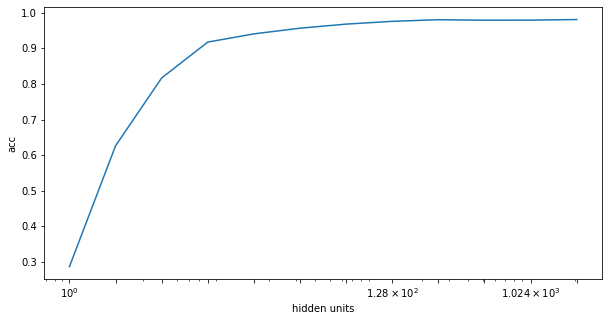

In [10]:
# different numbers of hidden units
def build_model(hidden_units=512):
    network = models.Sequential()
    network.add(layers.Dense(hidden_units, activation="relu", input_shape=(28 * 28,)))
    network.add(layers.Dense(10, activation="softmax"))
    network.compile(optimizer="rmsprop",
                    loss="categorical_crossentropy",
                    metrics=["accuracy"])
    return network

hidden_units = 2 ** np.arange(12)
results = []
for cur_hidden_units in hidden_units:
    print("hidden units:", cur_hidden_units)
    network = build_model(hidden_units=cur_hidden_units)
    network.fit(train_images, train_labels, epochs=5, batch_size=128)
    test_loss, test_acc = network.evaluate(test_images, test_labels)
    results.append(test_acc)
    print("")

plt.figure(figsize=(10, 5))
plt.plot(hidden_units, results)
plt.xscale("log")
plt.xticks(hidden_units)
plt.xlabel("hidden units")
plt.ylabel("acc")
plt.show()

model 1
Epoch 1/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.2520 - acc: 0.9271
Epoch 2/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.1018 - acc: 0.9692
Epoch 3/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.0673 - acc: 0.9799
Epoch 4/5
60000/60000 [==============================] - 1s 24us/step - loss: 0.0488 - acc: 0.9855
Epoch 5/5
60000/60000 [==============================] - 2s 25us/step - loss: 0.0365 - acc: 0.9894

model 2
Epoch 1/5
60000/60000 [==============================] - 2s 33us/step - loss: 0.2611 - acc: 0.9237
Epoch 2/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.1050 - acc: 0.9684
Epoch 3/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.0688 - acc: 0.9795
Epoch 4/5
60000/60000 [==============================] - 1s 24us/step - loss: 0.0500 - acc: 0.9847
Epoch 5/5
60000/60000 [==============================] - 2s 25us/step - loss: 0.0372 - acc: 

60000/60000 [==============================] - 2s 27us/step - loss: 0.1034 - acc: 0.9687
Epoch 3/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.0689 - acc: 0.9793
Epoch 4/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.0502 - acc: 0.9846
Epoch 5/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.0375 - acc: 0.9887

model 18
Epoch 1/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.2535 - acc: 0.9266
Epoch 2/5
60000/60000 [==============================] - 2s 28us/step - loss: 0.1028 - acc: 0.9702
Epoch 3/5
60000/60000 [==============================] - 1s 25us/step - loss: 0.0681 - acc: 0.9796
Epoch 4/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.0502 - acc: 0.9852
Epoch 5/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.0384 - acc: 0.9885

model 19
Epoch 1/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.2541 - acc: 0.9260


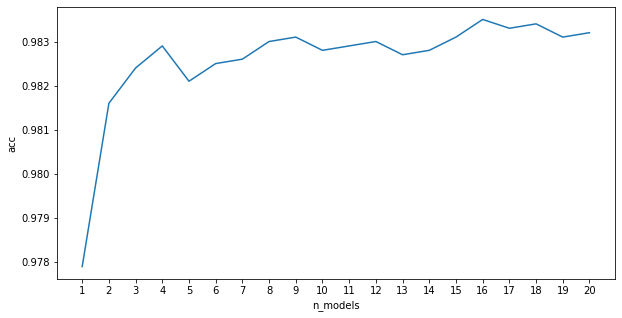

In [11]:
# averaging multiple models
def build_model():
    network = models.Sequential()
    network.add(layers.Dense(512, activation="relu", input_shape=(28 * 28,)))
    network.add(layers.Dense(10, activation="softmax"))
    network.compile(optimizer="rmsprop",
                    loss="categorical_crossentropy",
                    metrics=["accuracy"])
    return network

n_models = 20
pred = np.zeros((test_images.shape[0], 10))
results = []
for i in range(n_models):
    print("model", i + 1)
    network = build_model()
    network.fit(train_images, train_labels, epochs=5, batch_size=128)
    pred += network.predict(test_images)
    results.append(accuracy_score(test_labels.argmax(axis=1), (pred / (i + 1)).argmax(axis=1)))
    print("")

plt.figure(figsize=(10, 5))
plt.plot(np.arange(n_models), results)
plt.xticks(np.arange(n_models), np.arange(n_models) + 1)
plt.xlabel("n_models")
plt.ylabel("acc")
plt.show()

model 1
Epoch 1/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.2589 - acc: 0.9244
Epoch 2/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.1037 - acc: 0.9687
Epoch 3/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.0691 - acc: 0.9789
Epoch 4/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.0500 - acc: 0.9850
Epoch 5/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.0375 - acc: 0.9885

model 2
Epoch 1/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.2602 - acc: 0.9254
Epoch 2/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.1050 - acc: 0.9690
Epoch 3/5
60000/60000 [==============================] - 2s 28us/step - loss: 0.0687 - acc: 0.9800
Epoch 4/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.0501 - acc: 0.9849
Epoch 5/5
60000/60000 [==============================] - 2s 25us/step - loss: 0.0375 - acc: 

60000/60000 [==============================] - 2s 28us/step - loss: 0.1013 - acc: 0.9704
Epoch 3/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.0673 - acc: 0.9794
Epoch 4/5
60000/60000 [==============================] - 2s 28us/step - loss: 0.0484 - acc: 0.9853
Epoch 5/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.0359 - acc: 0.9889

model 18
Epoch 1/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.2545 - acc: 0.9267
Epoch 2/5
60000/60000 [==============================] - 2s 29us/step - loss: 0.1019 - acc: 0.9695
Epoch 3/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.0681 - acc: 0.9797
Epoch 4/5
60000/60000 [==============================] - 2s 29us/step - loss: 0.0491 - acc: 0.9850
Epoch 5/5
60000/60000 [==============================] - 2s 29us/step - loss: 0.0363 - acc: 0.9896

model 19
Epoch 1/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.2564 - acc: 0.9258


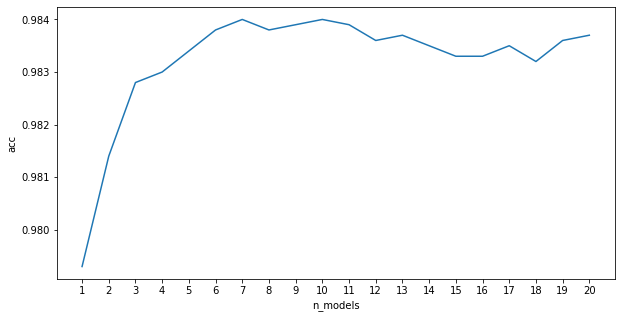

In [12]:
# similar results (slightly better) using Adam
def build_model():
    network = models.Sequential()
    network.add(layers.Dense(512, activation="relu", input_shape=(28 * 28,)))
    network.add(layers.Dense(10, activation="softmax"))
    network.compile(optimizer="rmsprop",
                    loss="categorical_crossentropy",
                    metrics=["accuracy"])
    return network

n_models = 20
pred = np.zeros((test_images.shape[0], 10))
results = []
for i in range(n_models):
    print("model", i + 1)
    network = build_model()
    network.fit(train_images, train_labels, epochs=5, batch_size=128)
    pred += network.predict(test_images)
    results.append(accuracy_score(test_labels.argmax(axis=1), (pred / (i + 1)).argmax(axis=1)))
    print("")

plt.figure(figsize=(10, 5))
plt.plot(np.arange(n_models), results)
plt.xticks(np.arange(n_models), np.arange(n_models) + 1)
plt.xlabel("n_models")
plt.ylabel("acc")
plt.show()